## Week 4 assignment continued...

As my Kernel kept on dying, I have decided to start a new notebook for the next set of data exploration. I have not explained the first few steps that I have also followed in the previous notebook and will start providing additional information when I do new steps. 

In [1]:
# Importing all packages that will be necessary for the data exploration 

# Importing the pandas library 
import pandas as pd

#For creating or removing a directory folder
import os

#To allow me to work with numerical data
import numpy as np

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Note that due to the previous storage issues, I am now importing a csv file that I have already edited in excel so that only the columns I need are in this file. 

In [9]:
#Importing CSV file and packages needed for this assignment
qol17=pd.read_csv('qols-v-2017-2018-YY Edited Week 4.csv')

In [10]:
#Importing ward shapefile
wards_shp=gpd.read_file("MDB_Wards_2020.shp")

In [11]:
qol17=qol17.rename(columns={"ward":"WardID"})

In [12]:
wards_shp['WardID'] = wards_shp['WardID'].astype(int)

In [13]:
wards_mer = wards_shp.merge(qol17, on='WardID')

I just want to make sure that I really only have the columns that I need, so I list all the columns I intend to keep.

In [16]:
#After deciding which columns to keep, I use the following command to get rid of the columns I don't need
columns_to_keep =['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'Date',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'Q3_02_country',
 'Q3_10_Retirement',
 'Q4_03_community',
 'Q8_06_idp',
 'Q9_02_infl_dev',
 'Q9_07_foreigners',
 'Q9_10_BW_trust',
 'Q9_12_foreigners',
 'Q9_15_Black_opport_more',
 'Q9_16_Violenc_LBG',
 'Q9_20_Interracial_dating',
 'Q12_03_day',
 'Q12_04_night', 
 'Q15_02_age',
 'Q15_02_age_recode',
 'Q15_20_income']

In [17]:
wards_mer = wards_mer[columns_to_keep]

Just to note here, that by now I have already used half of my memory space (497.88), eventhough I used an already pre-edited csv file. 

## Data Exploration
Now that I have merged the files again and cleaned the data, I want to explore the data and create to understand more about the racial breakdown of the region. Therefore I start with exploring the variable Population Group

In [18]:
wards_mer['A1_Pop_group'].value_counts()

African         19864
White            2490
Coloured          814
Indian/Asian      358
Other              80
Name: A1_Pop_group, dtype: int64

I can see that the majority of people in Gauteng identify as African. I want to save this as a new dataframe, which I call race.

In [20]:
race = wards_mer['A1_Pop_group'].value_counts()

In [21]:
race = race.reset_index()

With the above command I am now able to manipulate the race dataframe

In [22]:
race

,index,A1_Pop_group
0,African,19864
1,White,2490
2,Coloured,814
3,Indian/Asian,358
4,Other,80


I will first rename the columns, so that it is easier for me to work with and plot.

In [23]:
race.columns = ['A1_Pop_group','Count']

In [24]:
race.head()

,A1_Pop_group,Count
0,African,19864
1,White,2490
2,Coloured,814
3,Indian/Asian,358
4,Other,80


While we already know that the majority of people living in the Gauteng region identify as African, I want to see what this looks like in a pie chart. 

Text(0.5, 1.0, 'Breakdown of Population Groups in Gauteng Region')

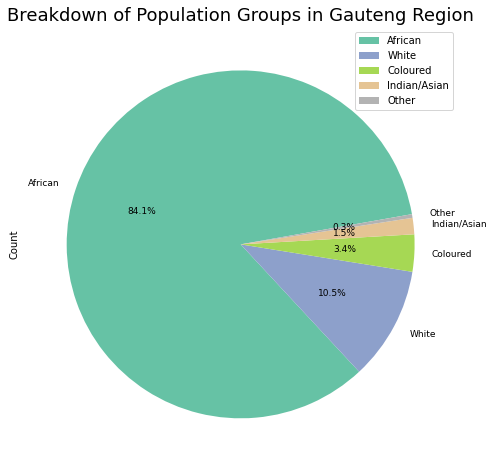

In [26]:
plt.figure(figsize=(21,8))
ax1 = plt.subplot(121, aspect = 'equal')
race.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=race['A1_Pop_group'],
             legend=True, fontsize=9)
plt.title("Breakdown of Population Groups in Gauteng Region", fontsize = 18)

I can now see what the percent is of African's in the Gauteng region, which is perhaps unsurprisingly almost 85%. This is important to bear in mind when analysing our questions on how racial attitudes have changed over time in the Gauteng region, and how the new BRT has influenced the attitudes towards other racial groups. 

## Exploring the relationship between two variables. 

I want to explore what the relationship is between population group and attitudes towards foreigeners (Variable Q9_12_foreigners). I can do this using the cross tab function and then using the query function to basically create pie charts that tell me what the racial breakdown is of the responses to this question. I wasn't 100% sure how to do this, but my partner suggested querying wards, which I will attempt below. 


In [30]:
race_2 = pd.crosstab(index=wards_mer['WardID'],
                        columns=wards_mer['A1_Pop_group'],
                       margins=True,
                       margins_name='Total Number')

In [31]:
race_2

A1_Pop_group,African,Coloured,Indian/Asian,Other,White,Total Number
WardID,,,,,,
74201001,11,2,0,0,23,36
74201002,36,1,0,0,0,37
74201003,28,2,0,0,4,34
74201004,24,0,0,0,10,34
74201005,13,1,0,0,17,31
...,...,...,...,...,...,...
79900104,36,1,0,0,0,37
79900105,27,1,0,0,3,31
79900106,37,0,0,1,0,38


In [52]:
race_2_african = wards_mer.query("A1_Pop_group == 'African'")

In [53]:
race_2_african

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_10_BW_trust,Q9_12_foreigners,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q12_03_day,Q12_04_night,Q15_02_age,Q15_02_age_recode,Q15_20_income
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly agree,"Foreigners are alright, but they must have le...",Strongly disagree,Strongly disagree,Agree,Bit unsafe,Very unsafe,35,35-39,R1 601 - R3 200
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly agree,"Foreigners are alright, but they must have le...",Strongly disagree,Strongly disagree,Agree,Very unsafe,Very unsafe,28,25-29,R6 401 - R12 800
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Agree,"Foreigners are alright, but they must have le...",Neither agree nor disagree,Disagree,Neither agree nor disagree,Fairly safe,Bit unsafe,62,60-64,R1 601 - R3 200
3,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly agree,We have a lot in common with most of the fore...,Neither agree nor disagree,Strongly disagree,Agree,Neither safe nor unsafe,Very unsafe,25,25-29,R3 201 - R6 400
4,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Agree,"Foreigners are alright, but they must have le...",Disagree,Disagree,Disagree,Fairly safe,Fairly safe,47,45-49,Respondent refused
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23601,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Disagree,"Foreigners are alright, but they must have le...",Agree,Strongly agree,Disagree,Very safe,Fairly safe,23,20-24,R3 201 - R6 400
23602,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Agree,"Gauteng is for South Africans, foreigners sho...",Strongly disagree,Disagree,Disagree,Very safe,Very safe,44,40-44,R801 - R1 600
23603,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Agree,"Foreigners are alright, but they must have le...",Disagree,Strongly disagree,Strongly agree,Fairly safe,Very unsafe,26,25-29,Respondent refused
23604,3389,Gauteng,Mogale City Local Municipality,GT481,39,West Rand,DC48,2020-11-26,74801039,GT481_39,...,Disagree,"Foreigners are alright, but they must have le...",Disagree,Disagree,Agree,Very safe,Very safe,37,35-39,R6 401 - R12 800


I will do this for every race/population group

In [38]:
race_2_coloured = wards_mer.query("A1_Pop_group == 'Coloured'")

In [39]:
race_2_indas = wards_mer.query("A1_Pop_group == 'Indian/Asian'")

In [40]:
race_2_other = wards_mer.query("A1_Pop_group == 'Other'")

In [41]:
race_2_white = wards_mer.query("A1_Pop_group == 'White'")

If I understood this correctly, I have now created geodataframes for each population group so that the responses can be mapped. 

However, before I get into any mapping, I want to make another pie chart with the breakdown of responses per race

In [49]:
# Save this as a new dataframe so that it can be changed
white_att_foreigners = race_2_white['Q9_12_foreigners'].value_counts()

white_att_foreigners = white_att_foreigners.reset_index()

# Renaming columns for clarity
white_att_foreigners.columns = ['Q9_12_foreigners', 'Count']

# viewing the responses to get an initial idea of outcome 
white_att_foreigners

,Q9_12_foreigners,Count
0,"Foreigners are alright, but they must have le...",1869
1,"Gauteng is for South Africans, foreigners sho...",345
2,We have a lot in common with most of the fore...,276


This shows me that most white people responded saying: "Foreigners are alirght, but they must have legal permission to stay from the government". The second most common response was "Gauteng is for South Africans, foreigners should go back home". The least common answer was that "We have a lot in common with most of the foreigners, they must  be allowed to stay". 

I now want to explore this for other population groups.

In [54]:
# Save this as a new dataframe so that it can be changed
african_att_foreigners = race_2_african['Q9_12_foreigners'].value_counts()

african_att_foreigners = african_att_foreigners.reset_index()

# Renaming columns for clarity
african_att_foreigners.columns = ['Q9_12_foreigners', 'Count']

# viewing the responses to get an initial idea of outcome 
african_att_foreigners

,Q9_12_foreigners,Count
0,"Foreigners are alright, but they must have le...",13058
1,"Gauteng is for South Africans, foreigners sho...",3424
2,We have a lot in common with most of the fore...,3382


In [55]:
# Save this as a new dataframe so that it can be changed
other_att_foreigners = race_2_other['Q9_12_foreigners'].value_counts()

other_att_foreigners = other_att_foreigners.reset_index()

# Renaming columns for clarity
other_att_foreigners.columns = ['Q9_12_foreigners', 'Count']

# viewing the responses to get an initial idea of outcome 
other_att_foreigners

,Q9_12_foreigners,Count
0,"Foreigners are alright, but they must have le...",47
1,We have a lot in common with most of the fore...,32
2,"Gauteng is for South Africans, foreigners sho...",1


Interestingly in the other category, more people said that "We have a lot in common with most of the foreigners, they must  be allowed to stay". 

In [56]:
# Save this as a new dataframe so that it can be changed
coloured_att_foreigners = race_2_coloured['Q9_12_foreigners'].value_counts()

coloured_att_foreigners = coloured_att_foreigners.reset_index()

# Renaming columns for clarity
coloured_att_foreigners.columns = ['Q9_12_foreigners', 'Count']

# viewing the responses to get an initial idea of outcome 
coloured_att_foreigners

,Q9_12_foreigners,Count
0,"Foreigners are alright, but they must have le...",551
1,"Gauteng is for South Africans, foreigners sho...",142
2,We have a lot in common with most of the fore...,121


Here again we have almost the same breakdown as the responses for africans and whites

In [58]:
# Save this as a new dataframe so that it can be changed
indas_att_foreigners = race_2_indas['Q9_12_foreigners'].value_counts()

indas_att_foreigners = indas_att_foreigners.reset_index()

# Renaming columns for clarity
indas_att_foreigners.columns = ['Q9_12_foreigners', 'Count']

# viewing the responses to get an initial idea of outcome 
indas_att_foreigners

,Q9_12_foreigners,Count
0,"Foreigners are alright, but they must have le...",260
1,We have a lot in common with most of the fore...,60
2,"Gauteng is for South Africans, foreigners sho...",38


Interestingly here we have similar responses as the other population group 

## Now let's map this in a bar chart

Text(0.5, 1.0, 'Attitudes towards foreigners - African')

<Figure size 432x288 with 0 Axes>

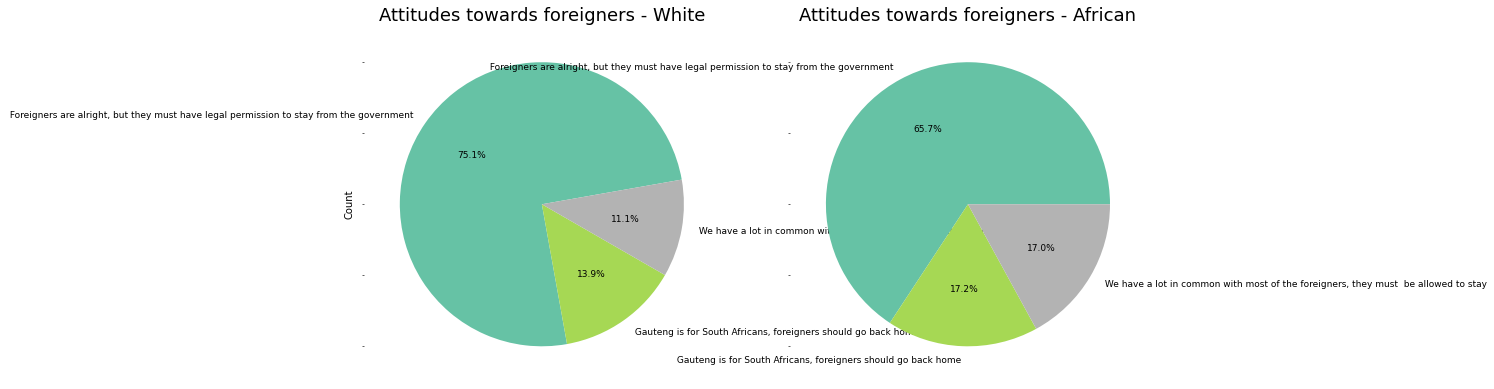

In [66]:
plt.figure(0)


# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(14, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

white_att_foreigners.plot(kind='pie',y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=white_att_foreigners['Q9_12_foreigners'],
             legend=False, fontsize=9)
ax1.set_title("Attitudes towards foreigners - White", fontsize = 18)

african_att_foreigners.plot(kind='pie',y = 'Count', ax=ax2, autopct = '%1.1f%%',
                     startangle=0,
             shadow=False,
             cmap='Set2',
             labels= african_att_foreigners['Q9_12_foreigners'],
             legend=False, fontsize=9)
ax2.set_title("Attitudes towards foreigners - African", fontsize = 18)


Text(0.5, 1.0, 'Attitudes towards foreigners - Other')

<Figure size 432x288 with 0 Axes>

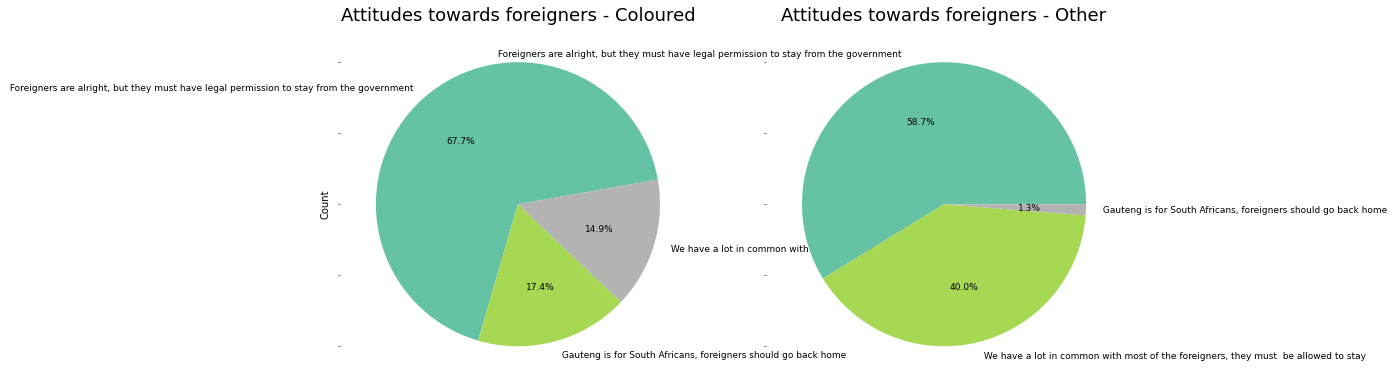

In [67]:
plt.figure(0)


# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(14, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

coloured_att_foreigners.plot(kind='pie',y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=coloured_att_foreigners['Q9_12_foreigners'],
             legend=False, fontsize=9)
ax1.set_title("Attitudes towards foreigners - Coloured", fontsize = 18)

other_att_foreigners.plot(kind='pie',y = 'Count', ax=ax2, autopct = '%1.1f%%',
                     startangle=0,
             shadow=False,
             cmap='Set2',
             labels= other_att_foreigners['Q9_12_foreigners'],
             legend=False, fontsize=9)
ax2.set_title("Attitudes towards foreigners - Other", fontsize = 18)



Text(0.5, 1.0, 'Attitudes towards foreigners - Indian Asian')

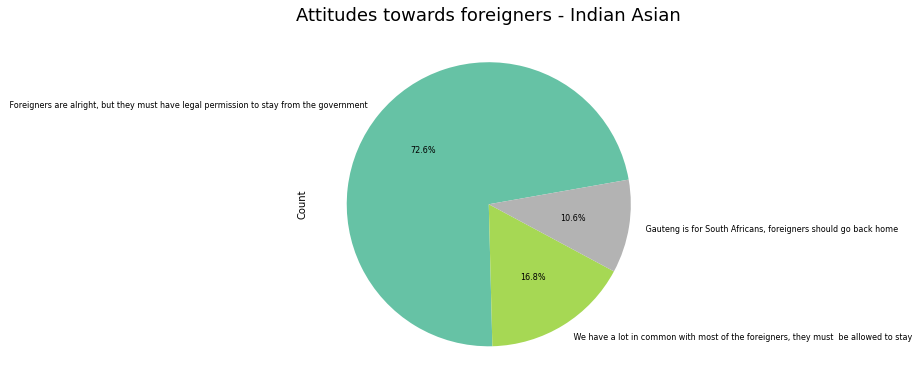

In [68]:
plt.figure(figsize=(14,12))
ax1 = plt.subplot(121, aspect = 'equal')
indas_att_foreigners.plot(kind='pie', y = 'Count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=indas_att_foreigners['Q9_12_foreigners'],
             legend=False, fontsize=8)
plt.title("Attitudes towards foreigners - Indian Asian", fontsize = 18)

I think from this we can conclude that the majority of respondents think that foreigners need to have legal rights to be in the country and have more negative views on informal workers. 

## Mapping violence towards foreigners

Now I want to have a look at the variable on whether it is acceptable to be violent towards foreigners and map this. However, I am running into issues mapping this which I am not sure how to solve. I used the same code as I did for my other map, however there seems to be no values. 


In [91]:
violence_foreigners = wards_mer['Q9_07_foreigners'].value_counts()

In [92]:
violence_foreigners

Series([], Name: Q9_07_foreigners, dtype: int64)

In [89]:
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Strongly disagree','violence_foreigners']=0
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Disagree','violence_foreigners']=1
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Neither agree nor disagree','violence_foreigners']=2
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Agree','violence_foreigners']=3
wards_mer.loc[wards_mer['Q9_07_foreigners']=='Strongly agree','violence_foreigners']=4
wards_mer [['Q9_07_foreigners','violence_foreigners']]

,Q9_07_foreigners,violence_foreigners
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
23601,NaN,NaN
23602,NaN,NaN
23603,NaN,NaN
23604,NaN,NaN


I am not entirely sure what I am doing wrong here, and will have to check in office hours how I might be able to solve this to carry on with the mapping part of the assignment. Unfortunately, I still have a little bit of work to do to make the mapping functions work, however I was able to explore more of the data and gain a much better understanding of how the codes worked. I was also able to practice some of the coding we learnt in the previous weeks. 